<h1>Author: Isgandarova Anastasiya</h1>

<h2>Task 2. Prediction using Unsupervised ML. </h2>

<p>From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually. Unsupervised learning is a type of algorithm that learns patterns from untagged data. Clustering is an unsupervised learning method that allows us to group set of objects based on similar characteristics. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length.</p>

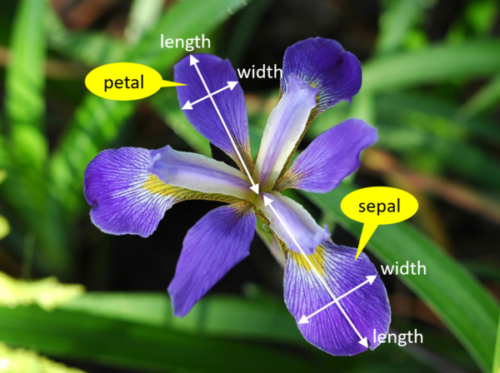

In [8]:
from PIL import Image
img = Image.open("/content/iris_image.png")
img

**Step 1. Import libraries**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')

**Step 2. Read the dataset**

In [10]:
from sklearn import datasets
iris_data = pd.read_csv('/content/Iris.csv')
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<p> Checking outliers in the dataset. </p>

In [12]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<p>Check the correlation of features in the dataset.</p>

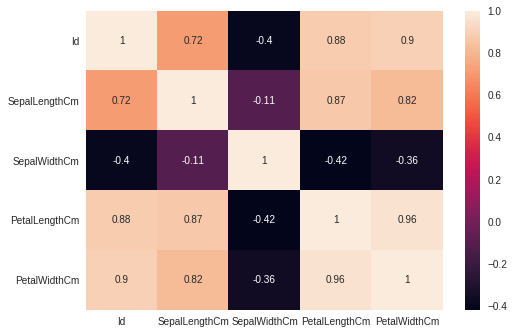

In [13]:
sns.heatmap(iris_data.corr(),annot = True)
plt.show()

**Step 3. Find optimum number of clusters for classification**

<p>For the usage of K-means algorithm, the number of clusters should be defined. The elbow method allows us to pick the optimum amount of clusters for classification. It looks at the total within cluster sum of squares (WSS) as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.</p>

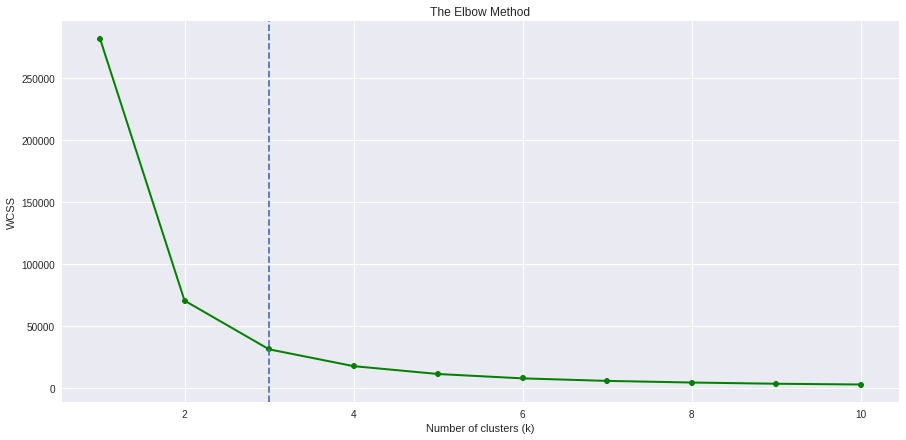

In [16]:
# Four fwatures of the dataset selected in variable X.
# The training of our model will be with these features. 
X = iris_data.iloc[:, [0, 1, 2, 3]].values

#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []
n_cluster_list = range(1,11)

for i in n_cluster_list:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="green", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')#within cluster sum of squares
plt.xlabel('Number of clusters (k)')
plt.title('The Elbow Method')
plt.show()

<p>The optimal number of clusters for our dataset are 3, as the slope of the curve is not steep enough after it.</p>

**Step 4. K-Means Clustering using k=3**

In [17]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

<p> Visualization of the clusters and plotting the clusters' centroids.</p>

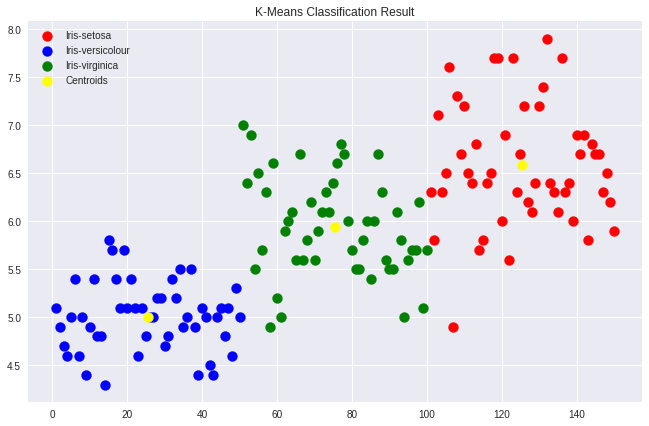

In [18]:
plt.figure(figsize = (11,7))
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.title("K-Means Classification Result")
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()
